# Audio Handling Demo
* This document is a `jupyter notebook`. It's a neat way of combining runnable code and text.
* Each of these boxes is a `cell`. You can evaluate a cell by clicking the `Run` button. Any cell can refer to variables set in cells above.
* First, we'll do some basic imports and setup:

In [25]:
import scipy.io.wavfile
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np


# sample_rate, data = scipy.io.wavfile.read("lord_of_rings1_one_ring.wav")
sample_rate, data = scipy.io.wavfile.read("cantina.wav")

def dbl_sin():
    """
    """
#this one is pretty easy to see visually

    xvals1 = np.arange(0, 10, 0.1)*1
    xvals2 = np.arange(0, 10, 0.1)*3


    yvals1 = np.sin(np.radians(xvals1))
    yvals2 = np.sin(np.radians(xvals2))

    xvals = xvals1+xvals2
    yvals = yvals1#+yvals2
    return xvals, yvals



# Basic Signals

## The Time Domain and a First Signal

Normally, we think of a signal as something that happens in the *time-domain*. In other words, we can describe the **amplitude** of the signal as a **function of time**.

Lets talk about a really basic signal, a [40 Hz *tone*](https://www.youtube.com/watch?v=wxb4-ZL7zIk).

This kind of signal is something we can model as:
$$ y = f(t) = \sin((2\pi)40t)  $$

Why the $ 2\pi $? We're going to use radians here for reasons that will become painfully clear if you take an actual signal processing class. For now, just trust me and remember that $ \frac{rad}{s} = frequency (Hz) \times 2\pi $

[Here's a link to some more info on the Fourier Transform.](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)


In any event, we can plot such a thing with Python:

(0, 0.05)

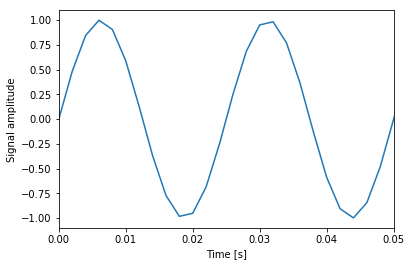

In [26]:


f = 40  # Frequency, in cycles per second, or Hertz
f_s = 500  # Sampling rate, or number of measurements per second.

# Lets generates 2*sampling_freq time values between here and 2 seconds
t = np.linspace(0, 2, 2 * f_s, endpoint=False)

# Now we generate f(t) for each t
y = np.sin(f * 2 * np.pi * t)

# plot t vs sin(t)
fig, ax = plt.subplots()
ax.plot(t, y)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
ax.set_xlim(0, 0.05)



Hopefully you got a sine wave. Otherwise you did something unfortunate.

So that's our 400Hz tone in the time domain.

But that's not the only way to express a signal...

## Frequency Domain and the Fourier Transform
The **frequency domain** is just like the time domain, but expresses the amount of each frequency in the signal.

To use a rough analogy, suppose I replaced the signal with a delicious smoothie. The fourier transform would give you the proportions of the major components (like strawberries, milk, bananas, etc...).

So why does this even work? I'll assert without proof that you can represent *any periodic signal* as a sum of arbitrary sines and cosines. **VERY ROUGHLY**, we're figuring out the frequencies of each of those sines and cosines, and that's what the fourier transform gives you.

Taking the Fourier transform can involve calculus and is generally a pain. Fortunately, we're already cheating by using two lists of discrete points - integrals just become sums! Also, someone wrote a Fourier transform function, fft, that accepts a list of points in the time domain. Lets try it out:


In [27]:
# This stuff is expensive to re-run, so it lives in a seperate cell
from scipy.fftpack import fft, fftfreq

Y = fft(y) 
freqs = fftfreq(len(y)) * f_s  # This is how we're going to generate our "frequency" axis

(-5, 110)

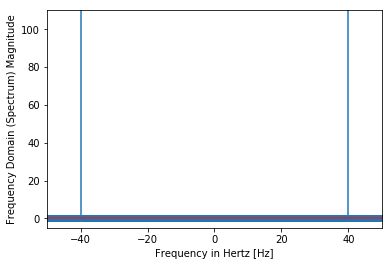

In [28]:


fig, ax = plt.subplots()

ax.stem(freqs, np.abs(Y))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-50, 50)
ax.set_ylim(-5, 110)

So you should see a plot with spikes at 40 (and -40) Hz. Here, all of the magnitude is at 40 Hz, but a more complex signal would have spikes representing its major components.


# More Complicated Signals
That's all well and good, but what about a slightly more complicated example?

This next one is a little more complex, it's one wave added to another. This is basically how AM radio works - you add the audio to a *carrier wave* and transmit it. The receiver just has to "subtract" the carrier to get the sound!

(0, 0.3)

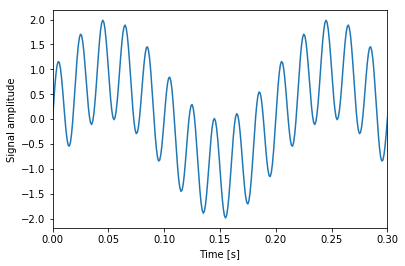

In [29]:
f1 = 5  # Frequency, in cycles per second, or Hertz
f2 = 50
f_s = 1000  # Sampling rate, or number of measurements per second.

# Lets generates 2*sampling_freq time values between here and 2 seconds
t = np.linspace(0, 2, 2 * f_s, endpoint=False)

# Now we generate f(t) for each t
y = np.sin(f1 * 2 * np.pi * t) + np.sin(f2 * 2 * np.pi * t)

# plot t vs sin(t)
fig, ax = plt.subplots()
ax.plot(t, y)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
ax.set_xlim(0, 0.3)

[[  5.]
 [ 50.]
 [-50.]
 [ -5.]]


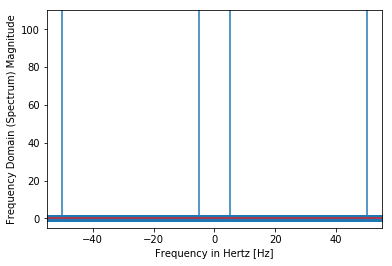

In [30]:
Y = fft(y) 
freqs = fftfreq(len(y)) * f_s  
fig, ax = plt.subplots()


ax.stem(freqs, np.abs(Y))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-55, 55)
ax.set_ylim(-5, 110)

# if you prefer the real values
peaks = np.argwhere(np.abs(Y) > 0.5)
print((freqs[peaks]))

The scale is isn't the nicest, but the frequency spikes here are at 5 and 50 Hz, which correspond to our two major components.